<a href="https://colab.research.google.com/github/VishalTyagi09/End-to-End-Project/blob/master/Fuel_Consumption_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cols = ['MPG','Cylinders','Displacements','Horsepower','Weight','Acceleration','Model Year','Origin']
df = pd.read_csv('/content/auto-mpg.data',names=cols, na_values= '?',comment='\t',sep=" ",skipinitialspace= True)

data = df.copy()

In [ ]:
data.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      398 non-null    int64  
 2   Displacements  398 non-null    float64
 3   Horsepower     392 non-null    float64
 4   Weight         398 non-null    float64
 5   Acceleration   398 non-null    float64
 6   Model Year     398 non-null    int64  
 7   Origin         398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
data.isnull().sum()

MPG              0
Cylinders        0
Displacements    0
Horsepower       6
Weight           0
Acceleration     0
Model Year       0
Origin           0
dtype: int64

In [ ]:
data.describe()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


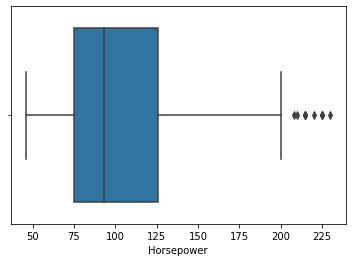

In [ ]:
sns.boxplot(x = data['Horsepower'])

In [ ]:
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      398 non-null    int64  
 2   Displacements  398 non-null    float64
 3   Horsepower     398 non-null    float64
 4   Weight         398 non-null    float64
 5   Acceleration   398 non-null    float64
 6   Model Year     398 non-null    int64  
 7   Origin         398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [ ]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

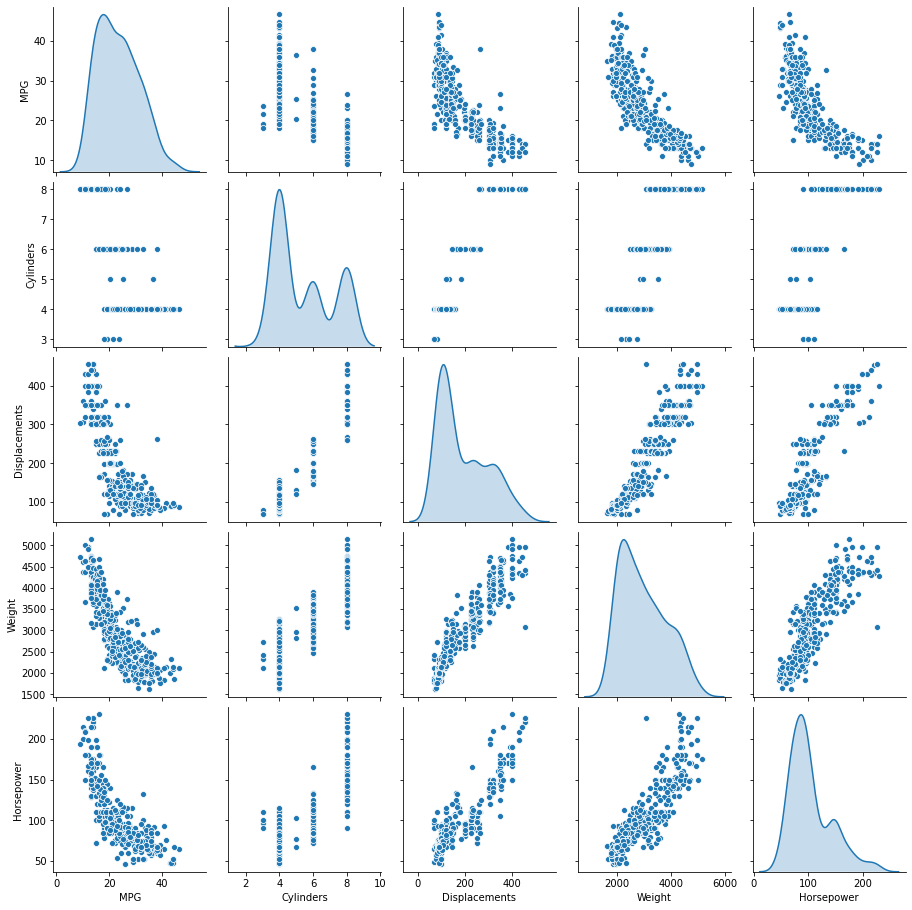

In [ ]:
sns.pairplot(data[["MPG","Cylinders","Displacements","Weight","Horsepower"]],diag_kind="kde")

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['Cylinders']):
  strat_train_index = data.loc[train_index]
  strat_test_index = data.loc[test_index]

In [ ]:
strat_train_index['Cylinders'].value_counts()/len(strat_train_index)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [ ]:
strat_test_index['Cylinders'].value_counts()/len(strat_test_index)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [ ]:
strat_train_index['Origin'] = strat_train_index['Origin'].map({1:'India',2:'USA',3:'Germany'})
strat_train_index.sample(10)

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
23,26.0,4,121.0,113.0,2234.0,12.5,70,USA
168,23.0,4,140.0,83.0,2639.0,17.0,75,India
306,28.8,6,173.0,115.0,2595.0,11.3,79,India
125,20.0,6,198.0,95.0,3102.0,16.5,74,India
176,19.0,6,232.0,90.0,3211.0,17.0,75,India
383,38.0,4,91.0,67.0,1965.0,15.0,82,Germany
60,20.0,4,140.0,90.0,2408.0,19.5,72,India
169,20.0,6,232.0,100.0,2914.0,16.0,75,India
37,18.0,6,232.0,100.0,3288.0,15.5,71,India
316,19.1,6,225.0,90.0,3381.0,18.7,80,India


In [ ]:
strat_train_index = pd.get_dummies(strat_train_index,prefix='',prefix_sep='')
strat_train_index.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [ ]:
data1 = strat_train_index.copy()

In [ ]:
data1['Displacement_on_power'] = data1['Displacements']/data1['Horsepower']
data1['Weight_on_cylinder'] = data1['Weight']/data1['Cylinders']
data1['Acceleration_on_power'] = data1['Acceleration']/data1['Horsepower']
data1['Acceleration_on_cylinder'] = data1['Acceleration']/data1['Cylinders']
corr_matrix = data1.corr()
corr_matrix['MPG'].sort_values(ascending = False)

MPG                         1.000000
Acceleration_on_cylinder    0.718888
Acceleration_on_power       0.696610
Model Year                  0.577636
Germany                     0.474024
Acceleration                0.411989
USA                         0.227377
Weight_on_cylinder          0.002289
Displacement_on_power      -0.564561
India                      -0.566147
Cylinders                  -0.765693
Horsepower                 -0.776055
Displacements              -0.800063
Weight                     -0.822723
Name: MPG, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

